# Лабораторная работа 3
Чичикин Тимофей Дмитриевич ИУ5-25М

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import plotly.express as px
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [5]:
df = pd.read_csv('Car Ownership.csv')

In [6]:
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


## Масштабирование признаков

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, MaxAbsScaler

In [8]:
df['Monthly Income'].to_string()

'0          40000\n1          60000\n2          25000\n3          80000\n4         100000\n5          50000\n6          35000\n7          20000\n8         120000\n9          90000\n10           NaN\n11          6000\n12          3000\n13          4000\n14          8000\n15          9000\n16         12000\n17          5000\n18          7000\n19          3500\n20          2500\n21          5500\n22          4500\n23          3000\n24          4000\n25          6000\n26         10000\n27          3500\n28          2000\n29          2500\n30       $4,500 \n31       $7,800 \n32       $3,200 \n33       $6,500 \n34       $3,000 \n35       $3,800 \n36      $10,000 \n37       $2,500 \n38       $5,200 \n39       $3,700 \n40       $8,500 \n41       $6,200 \n42       $2,800 \n43       $9,000 \n44       $3,000 \n45       $4,500 \n46       $2,500 \n47       $6,000 \n48       $3,500 \n49       $5,800 \n50       $6,800 \n51       $3,200 \n52       $4,500 \n53       $2,700 \n54       $3,600 \n55       

In [9]:
df['Monthly Income'] = df['Monthly Income'].str.replace('$', ' ')
df['Monthly Income'] = df['Monthly Income'].str.replace(',', '')
df['Monthly Income'] = df['Monthly Income'].str.replace('USD', ' ')
df['Monthly Income'] = df['Monthly Income'].str.replace('k', ' ')
df['Monthly Income'] = df['Monthly Income'].str.replace('usd', ' ')



In [10]:

df.at [434, 'Monthly Income'] = 4000


In [11]:
df['Monthly Income'] = df['Monthly Income'].astype('float')

### MinMax

In [12]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Monthly Income']])

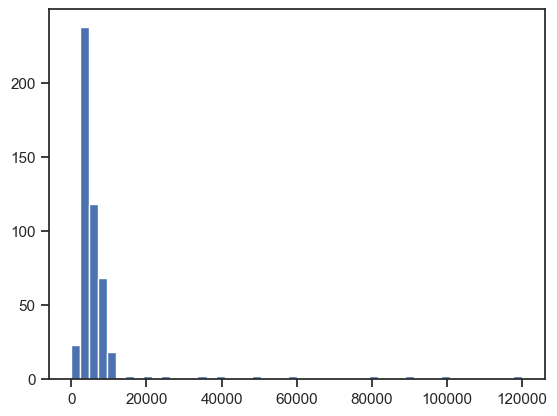

In [13]:
plt.hist(df['Monthly Income'], 50)
plt.show()

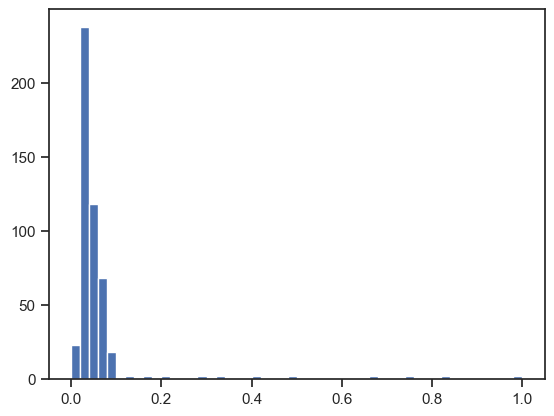

In [14]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки 

In [15]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['Monthly Income']])

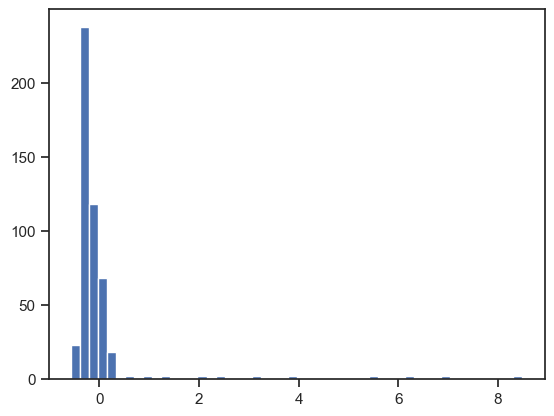

In [16]:
plt.hist(sc2_data, 50)
plt.show()

### Масштабирование по максимальному значению

In [17]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(df[['Monthly Income']])

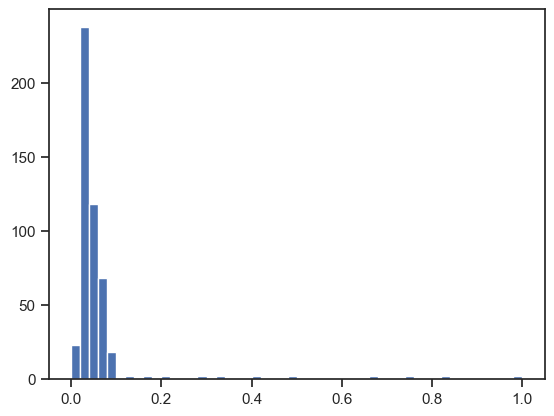

In [18]:
plt.hist(data_cs51_scaled_temp, 50)
plt.show()

# Обработка выбросов для числовых признаков

In [19]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [20]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
K2 = 1.5
IQR = df['avg_glucose_level'].quantile(0.75) - df['avg_glucose_level'].quantile(0.25)
lower_boundary = df['avg_glucose_level'].quantile(0.25) - (K2 * IQR)
upper_boundary = df['avg_glucose_level'].quantile(0.75) + (K2 * IQR)

In [22]:
lower_boundary, upper_boundary 

(np.float64(21.977500000000006), np.float64(169.35750000000002))

In [23]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

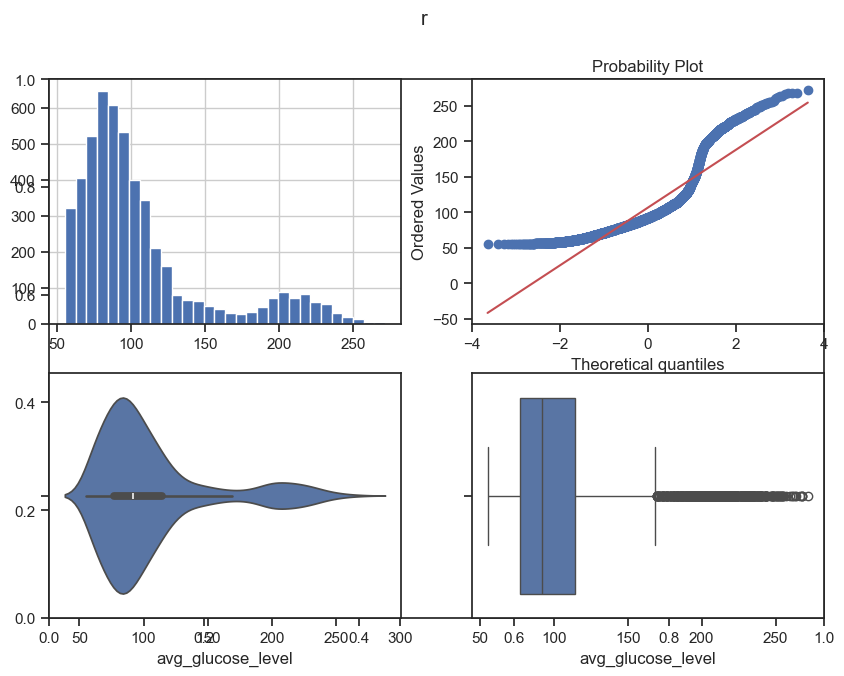

In [24]:
diagnostic_plots(df[['avg_glucose_level']], 'avg_glucose_level' , "r")

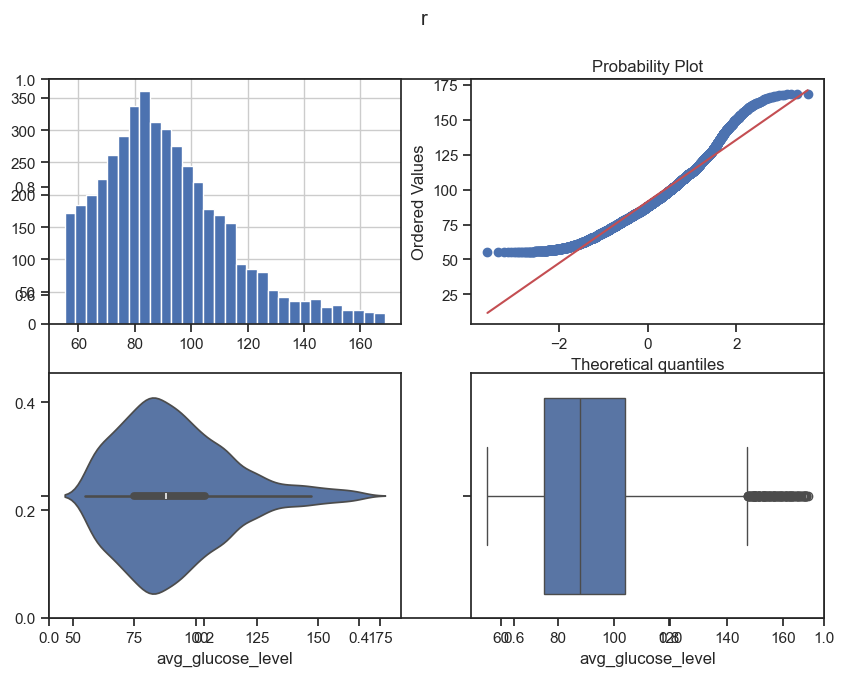

In [25]:
 outliers_temp = np.where(df['avg_glucose_level'] > upper_boundary, True, 
                                 np.where(df['avg_glucose_level'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = df.loc[~(outliers_temp), ]  

diagnostic_plots(data_trimmed, 'avg_glucose_level' , "r")

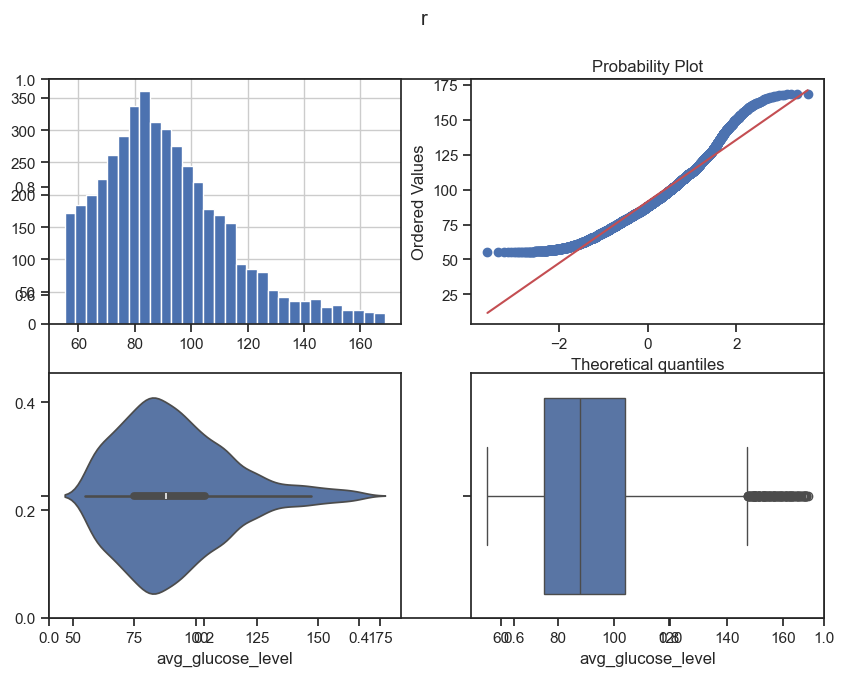

In [27]:
df['avg_glucose_level'] = np.where(df['avg_glucose_level'] > upper_boundary, upper_boundary, 
                                 np.where(df['avg_glucose_level'] < lower_boundary, lower_boundary, df['avg_glucose_level']))

# diagnostic_plots(data_update, 'avg_glucose_level', "r")
diagnostic_plots(data_trimmed, 'avg_glucose_level', "r")



# Обработка по крайней мере одного нестандартного признака (который не является числовым или категориальным);

In [28]:
df = pd.read_csv('seattle-weather.csv')

In [29]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [30]:
df['date'] = pd.to_datetime(df['date'])


In [31]:
# День
df['day'] = df['date'].dt.day

In [32]:
df['day_name'] = df['date'].dt.day_name()

In [33]:
df

,date,precipitation,temp_max,temp_min,wind,weather,day,day_name
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,Sunday
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,Monday
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,Tuesday
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,Wednesday
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,Thursday
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,27,Sunday
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,28,Monday
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,29,Tuesday
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,30,Wednesday


# Один метод из группы методов фильтрации (filter methods);

Удаление константных и псевдоконстантных (почти константных) признаков

In [34]:
from sklearn.feature_selection import VarianceThreshold

In [35]:
selector_1211 = VarianceThreshold(threshold=5.0)
selector_1211.fit(df[['precipitation', 'temp_max', 'temp_min', 'wind' ]])
# Значения дисперсий для каждого признака
selector_1211.variances_

array([44.59445204, 53.98197014, 25.21330161,  2.06592588])

In [36]:
selector_1211.transform(df[['precipitation', 'temp_max', 'temp_min', 'wind' ]])

array([[ 0. , 12.8,  5. ],
       [10.9, 10.6,  2.8],
       [ 0.8, 11.7,  7.2],
       ...,
       [ 0. ,  7.2,  0.6],
       [ 0. ,  5.6, -1. ],
       [ 0. ,  5.6, -2.1]])

# Один метод из группы методов обертывания (wrapper methods);

Алгоритмы полного перебора

In [37]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.0 MB/s eta 0:00:005.6 MB/s eta 0:00:01


In [38]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsClassifier(n_neighbors=3)

In [39]:
X = df[['precipitation', 'temp_max', 'temp_min', 'wind' ]]
y = df['weather']

In [40]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=4)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 11/11

Best accuracy score: 0.77
Best subset (indices): (0, 3)
Best subset (corresponding names): ('precipitation', 'wind')


/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Training data.
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Best accuracy score: 0.75
Best subset (indices): (0, 3)
Best subset (corresponding names): ('precipitation', 'wind')


# Один метод из группы методов вложений (embedded methods).

Логистическая регрессия

In [41]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X, y)
# Коэффициенты регрессии
e_lr1.coef_

array([[-24.18007186,  -0.07968546,   0.04760324,  -0.42044543],
       [-26.90205339,  -0.11487053,   0.11585446,  -0.35831287],
       [  0.52793365,  -0.32412514,   0.3854563 ,   0.05725867],
       [  0.08346434,  -0.2934803 ,  -0.24300255,   0.41556821],
       [-35.47785601,   0.14798528,  -0.13157143,   0.28018094]])

In [42]:

sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X, y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True])